In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/tf/code/preprocess/data_loader')
from data_loader import DataLoader
import cv2
import numpy as np
from collections import defaultdict

loader = DataLoader()
print(loader.length, loader.length_rois)

2023-05-29 15:40:10.224826: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Detectron2 not imported
3557 11003


2023-05-29 15:40:12.104952: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-29 15:40:12.104982: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: d8b931db208e
2023-05-29 15:40:12.104990: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: d8b931db208e
2023-05-29 15:40:12.105077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-05-29 15:40:12.105099: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5


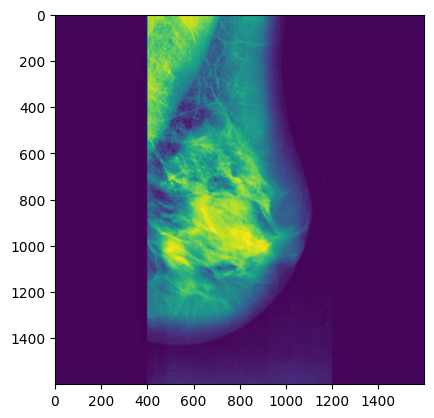

In [2]:
od_generator = loader.object_detection_generator()

for v, b in od_generator():
    plt.imshow(v)
    break

In [3]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids):
    img = np.array(image).astype("uint8")
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In [4]:
class_generator = loader.classification_generator(output_size=300, for_display=True)

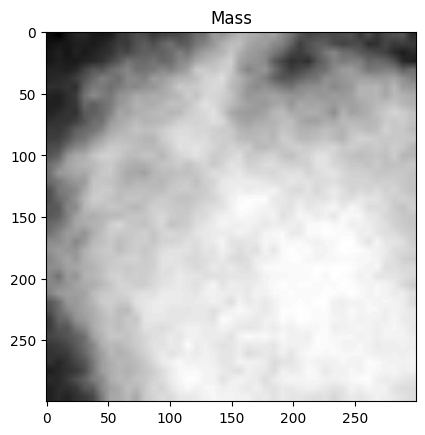

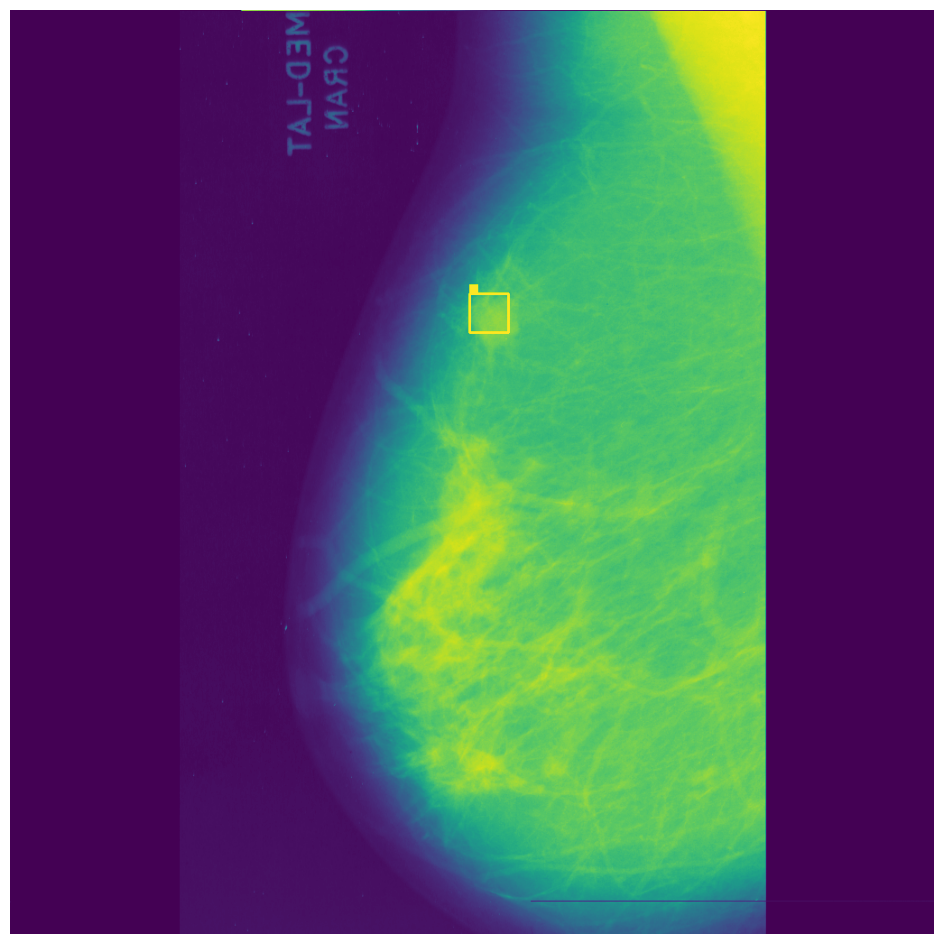

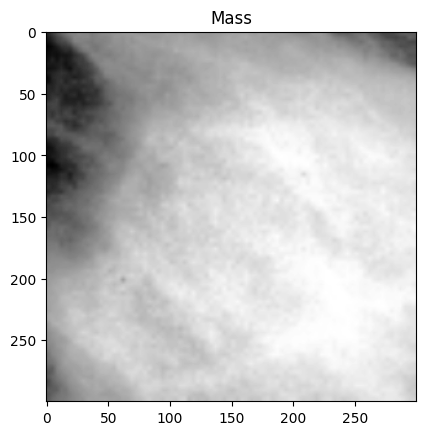

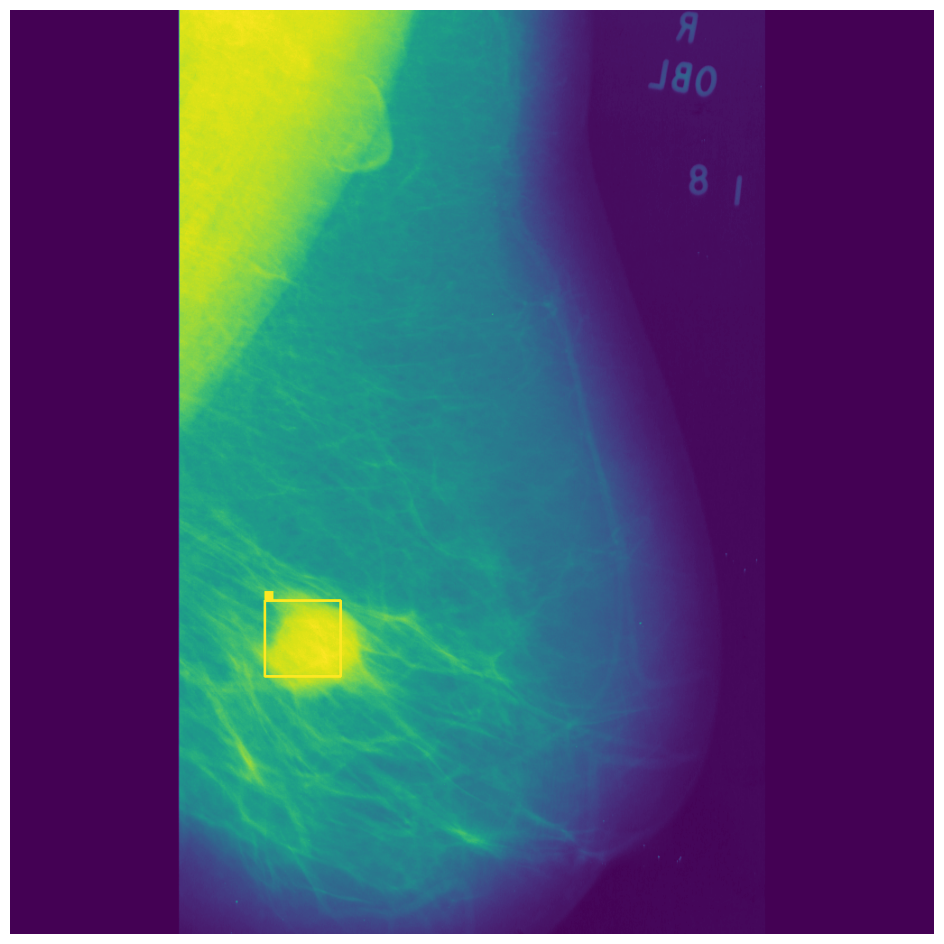

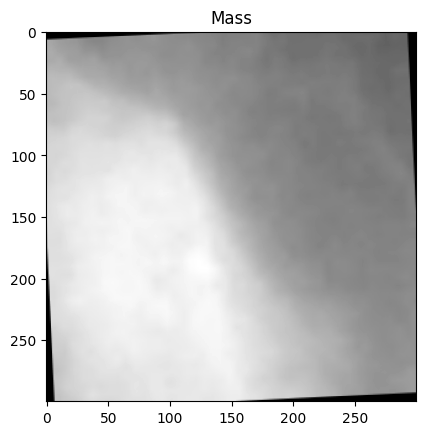

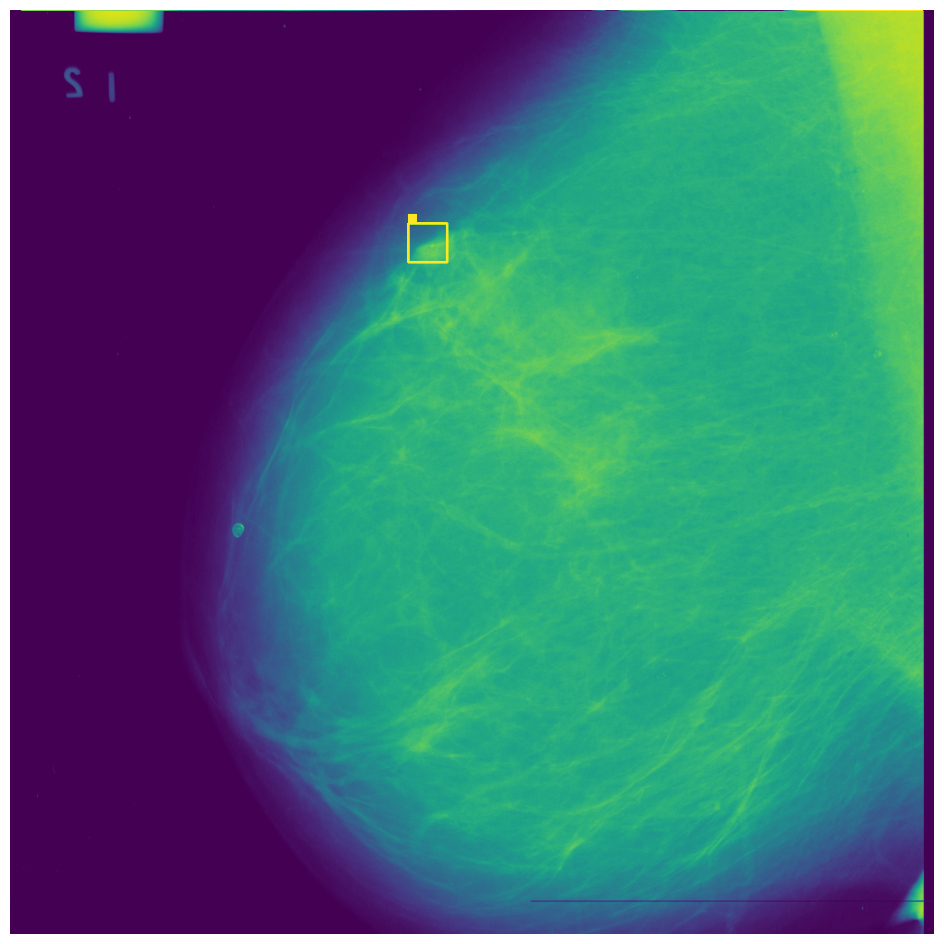

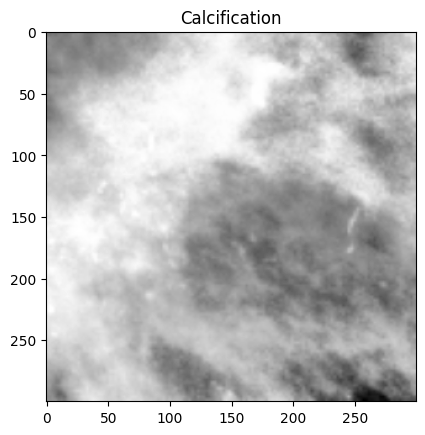

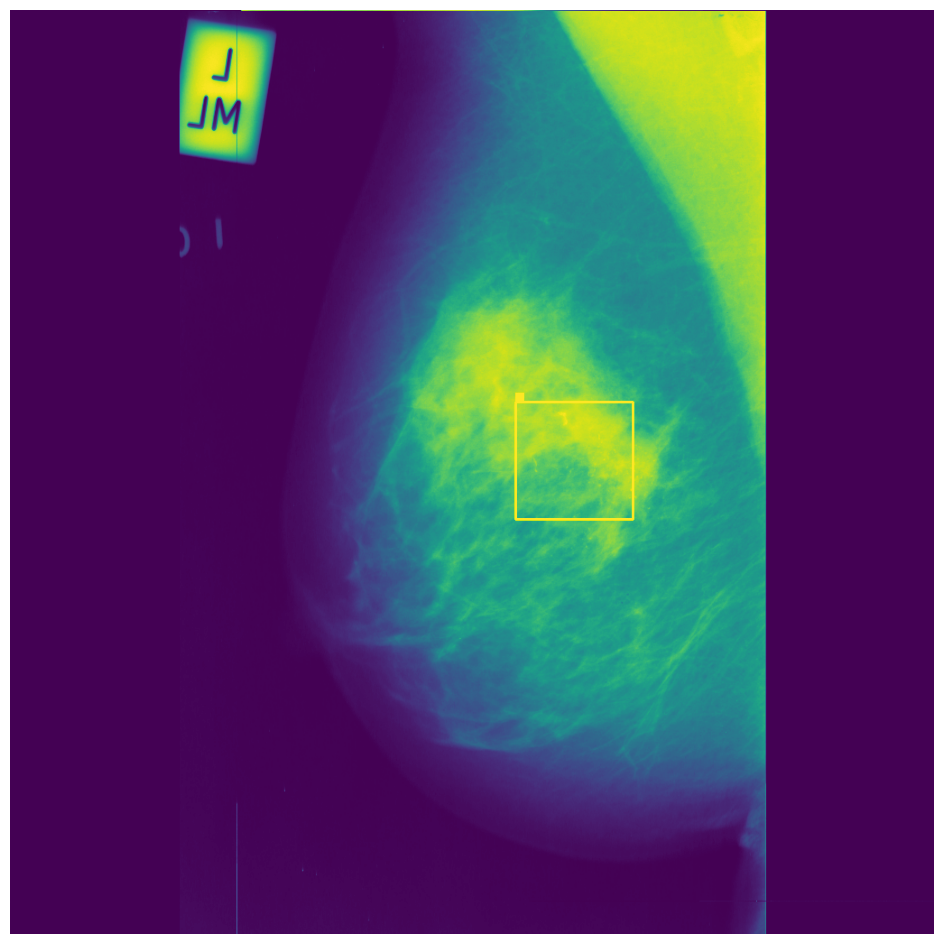

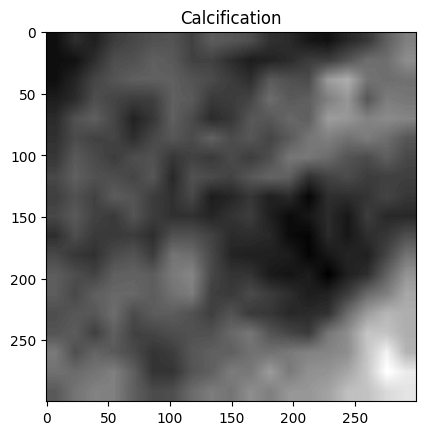

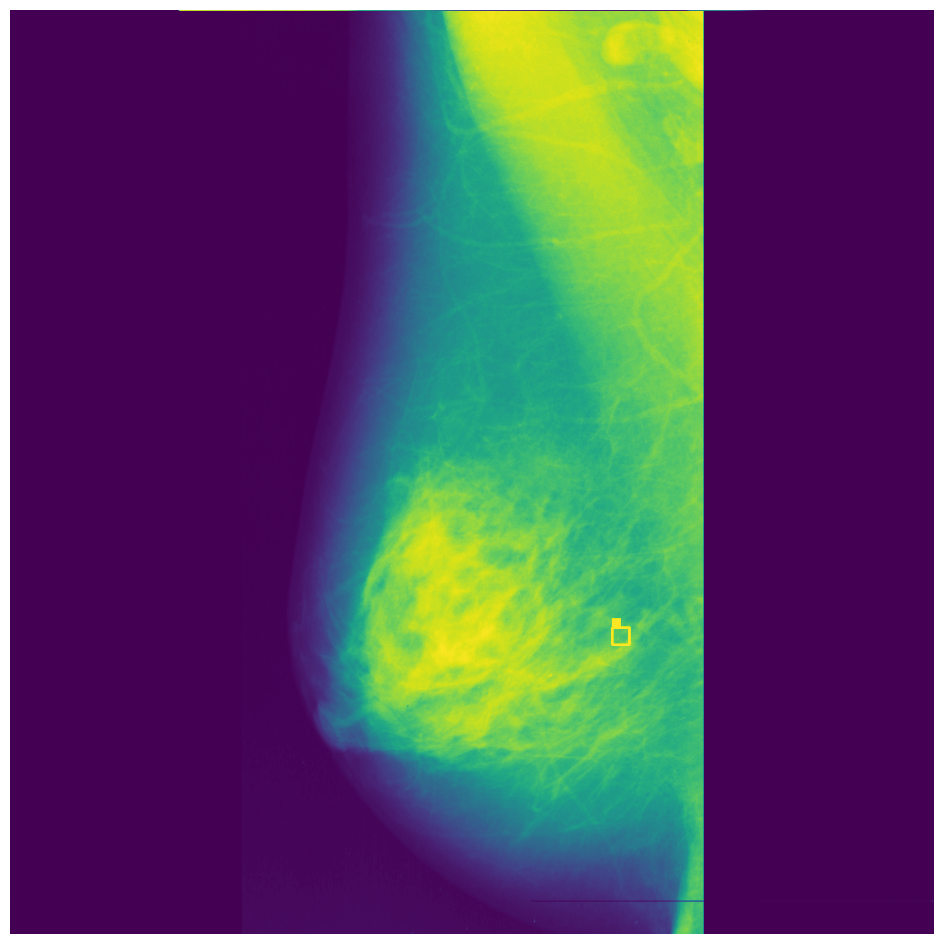

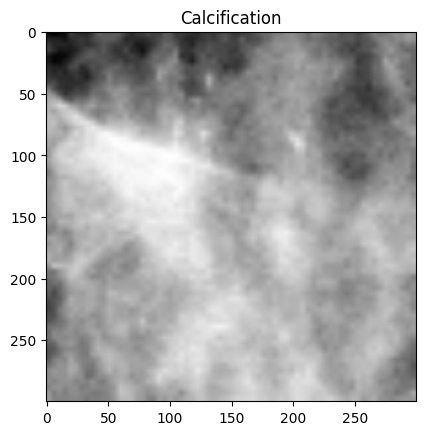

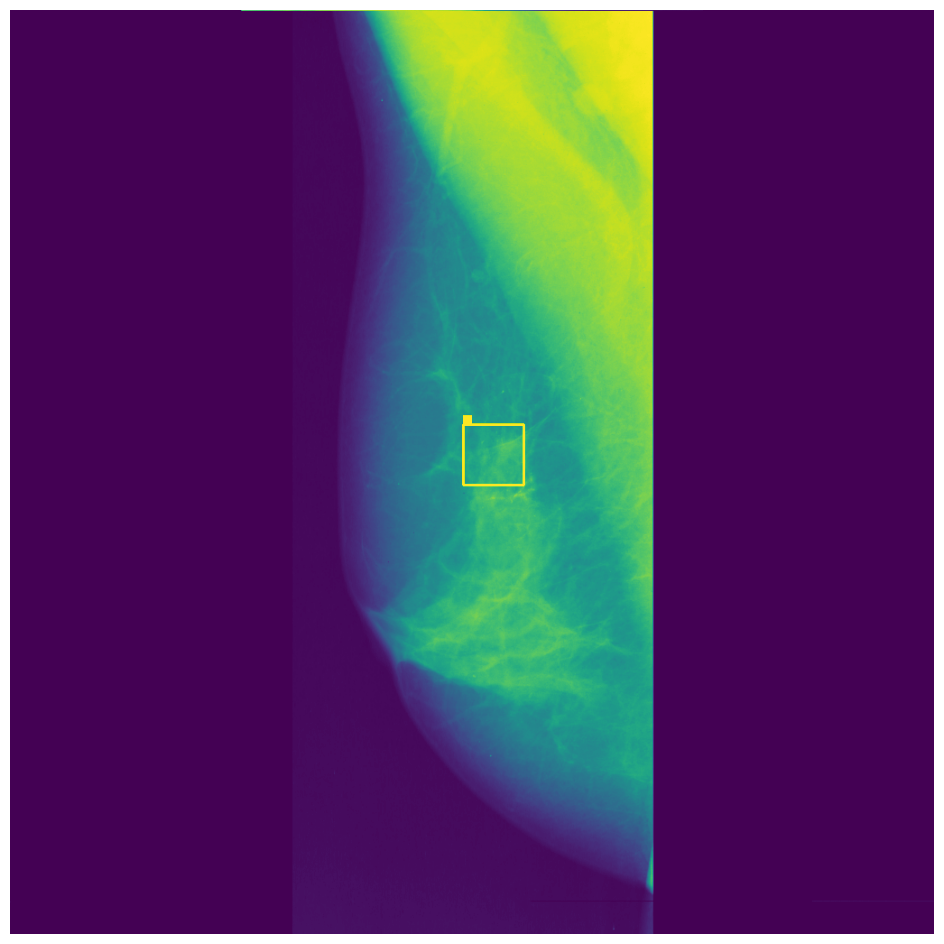

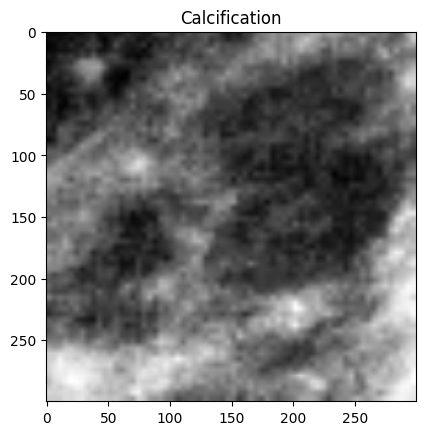

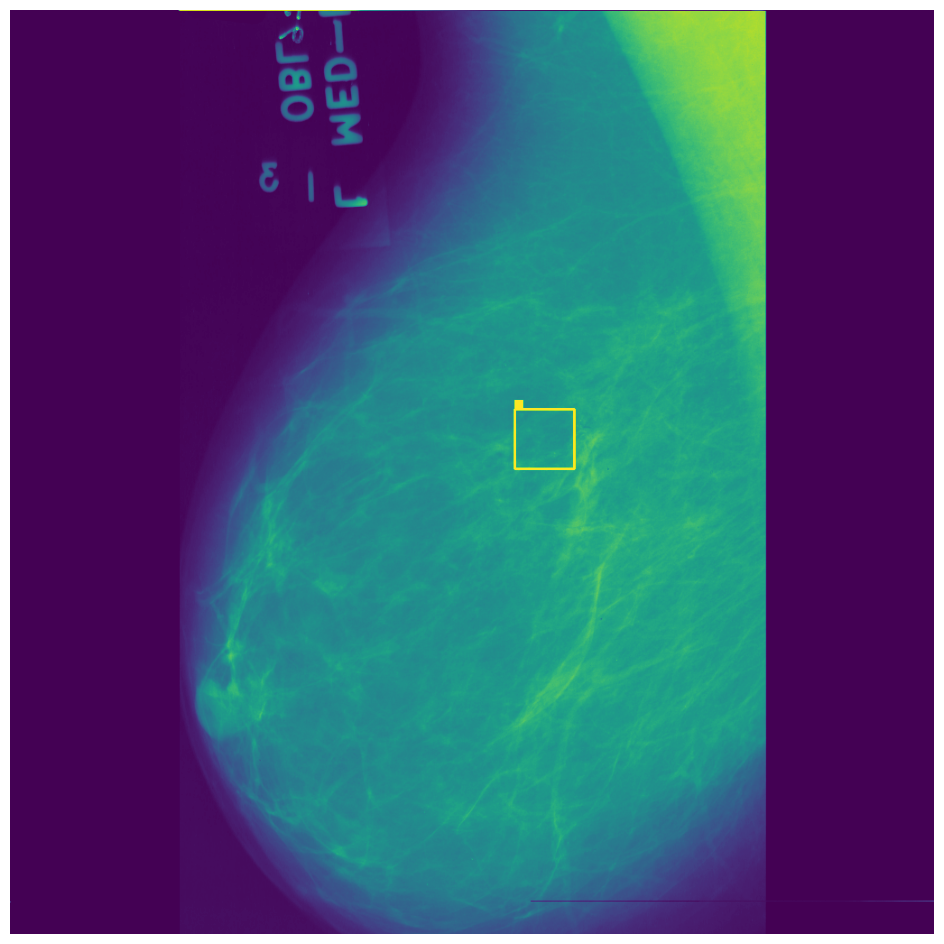

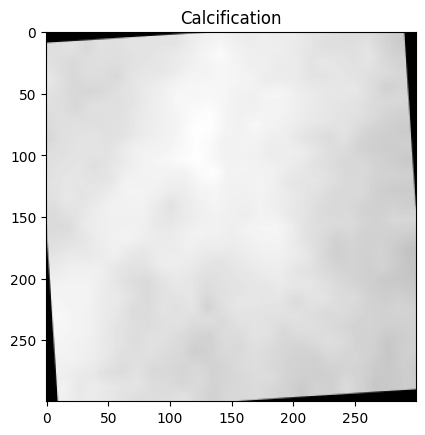

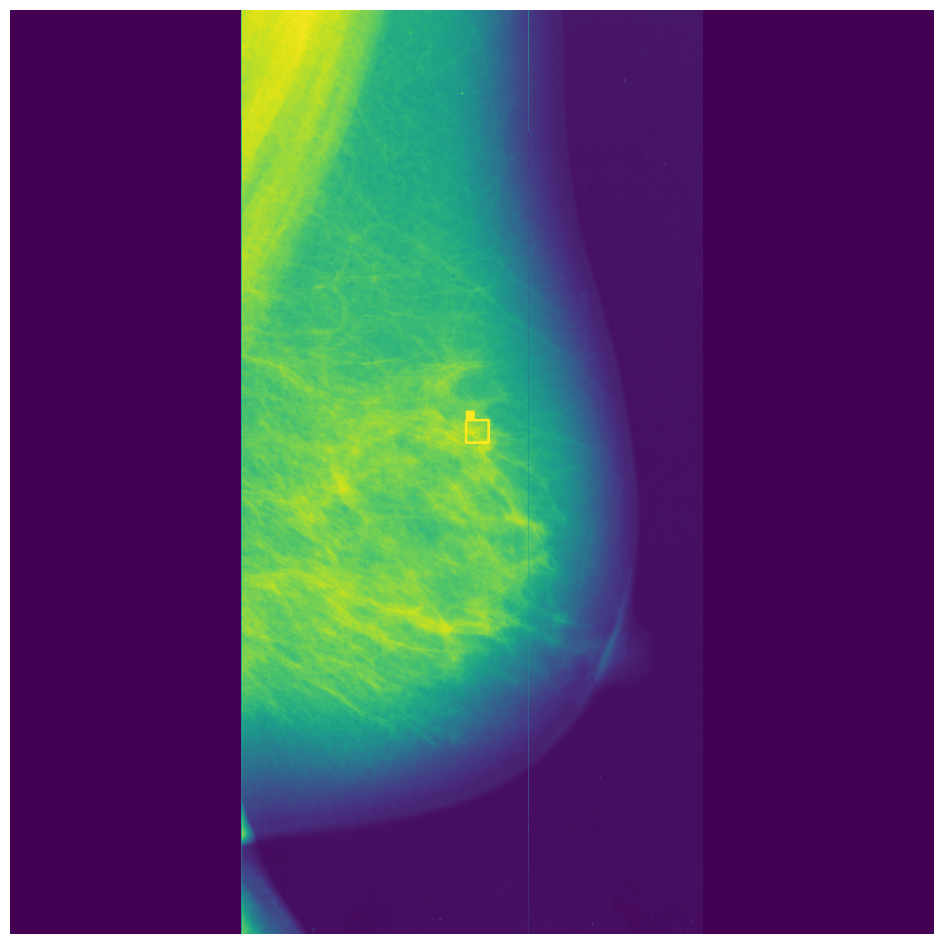

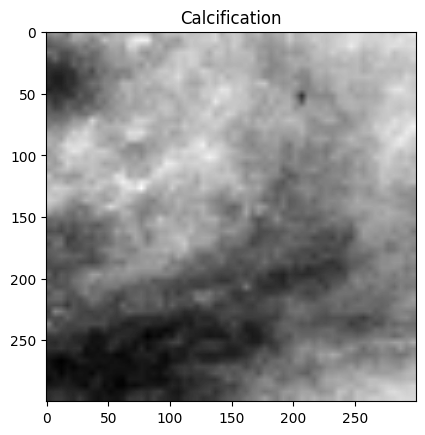

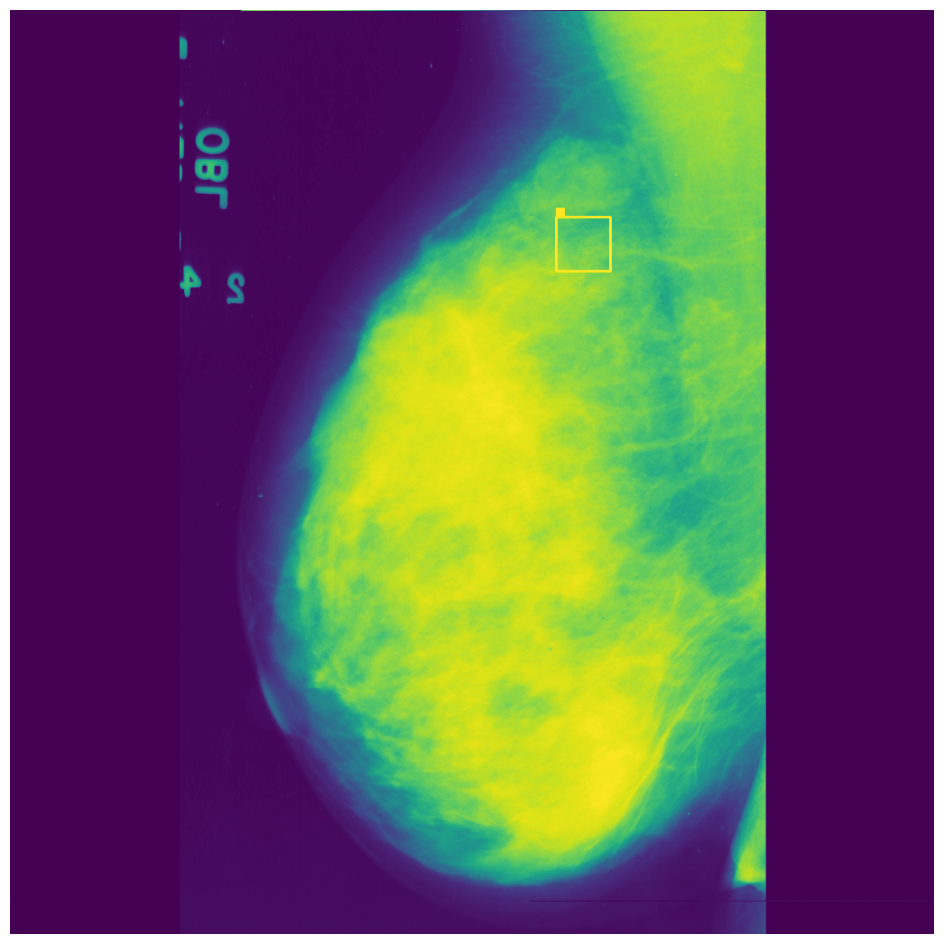

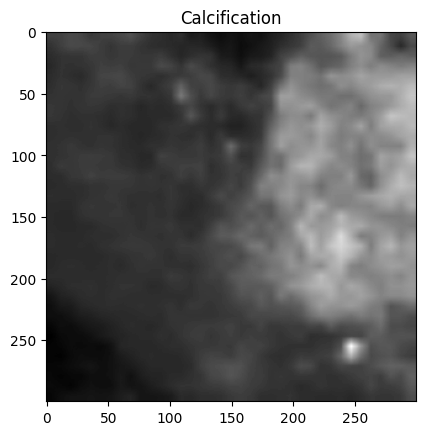

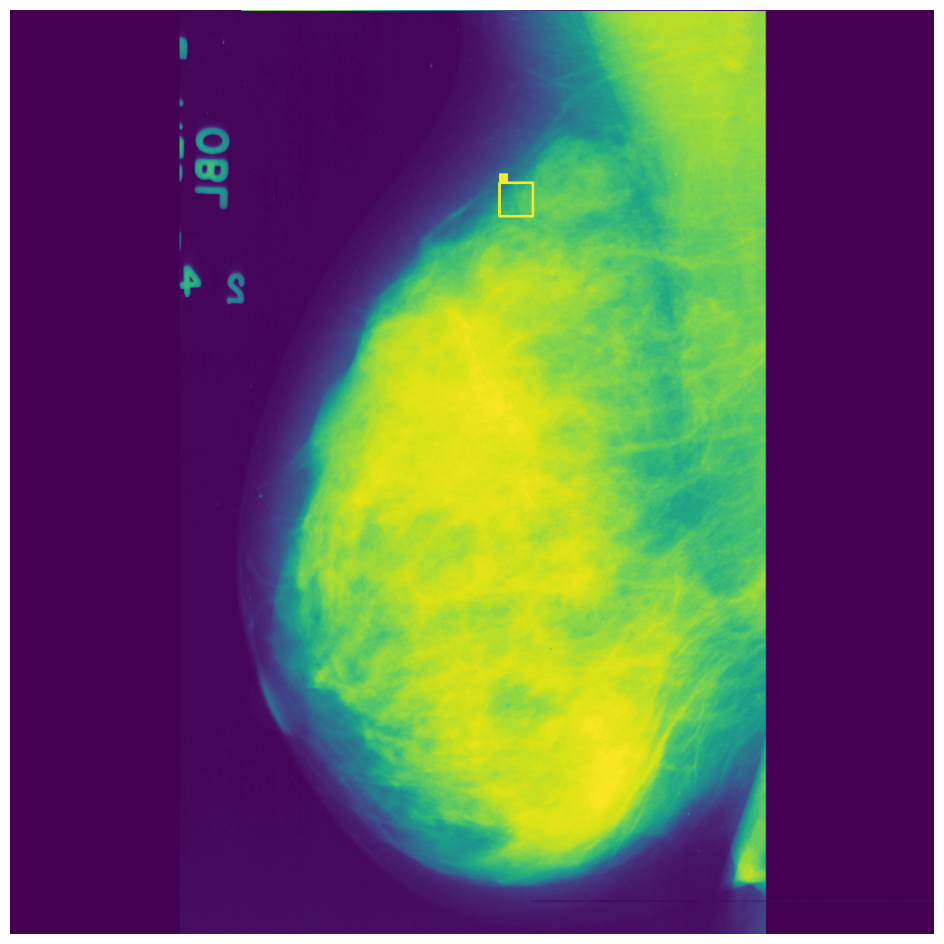

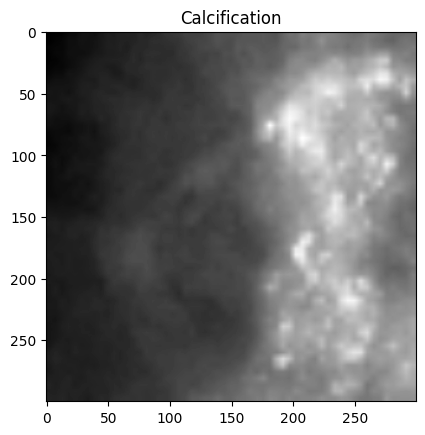

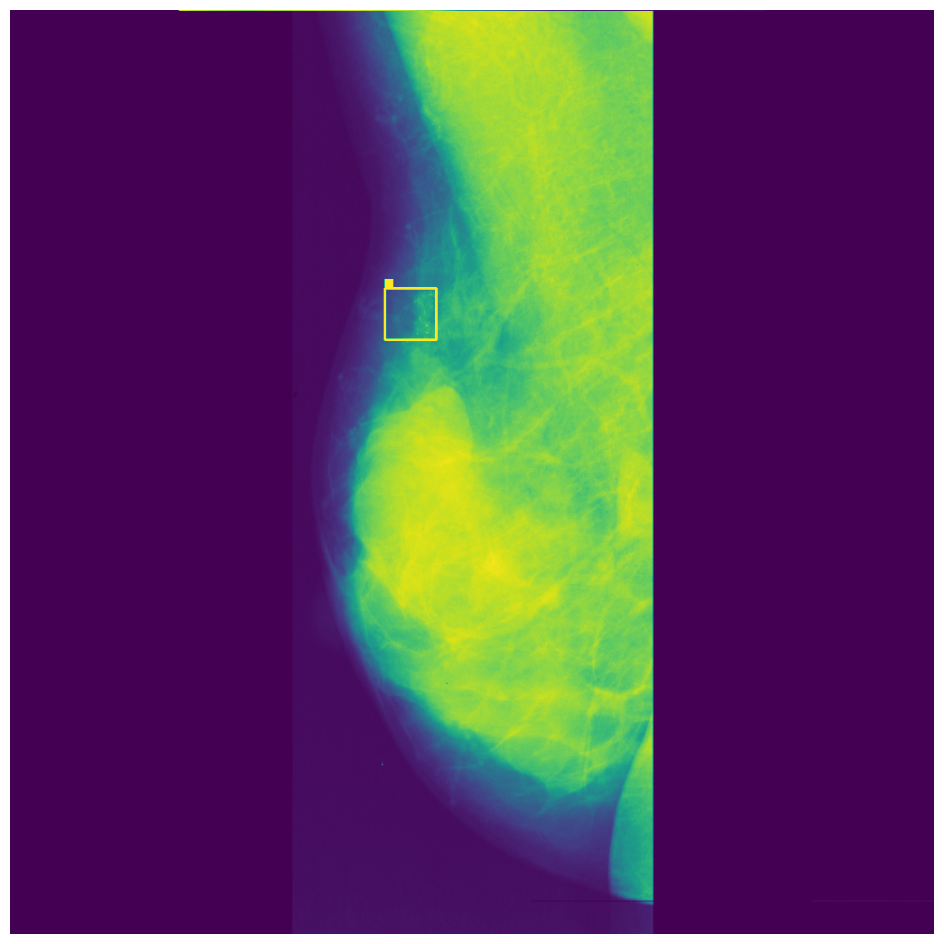

In [5]:
count=0
for crop, box_info,img in class_generator():
    if box_info["pathology"] == "M":
        plt.imshow(crop, cmap="gray")
        plt.title(box_info["type"])
        plt.show()
        visualize(img, [[box_info["x"], box_info["y"], box_info["w"], box_info["h"]]], box_info["pathology"])
        count+=1
        if count > 10:
            break


In [6]:
class_gen = loader.classification_generator(classify_types=True)

types=defaultdict(int)
for img, type in class_gen():
    types[type]+=1
    
print(types)

defaultdict(<class 'int'>, {'Mass': 1836, 'Unknown': 20, 'Assymetry': 21, 'Distortion': 22, 'Spiculated Region': 35, 'Calcification': 9042, 'Cluster': 27})


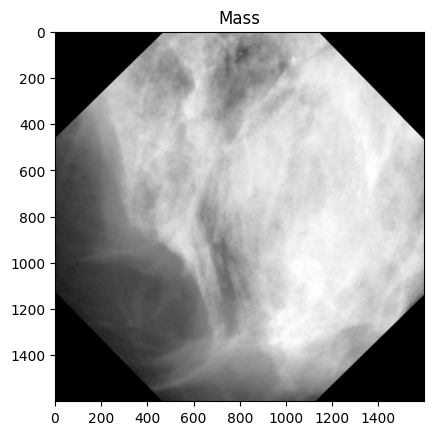

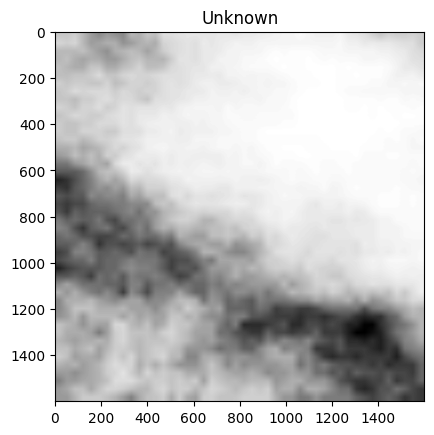

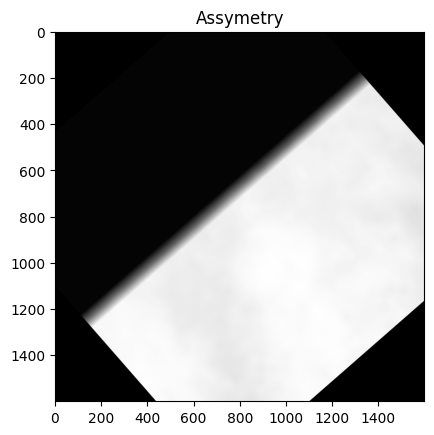

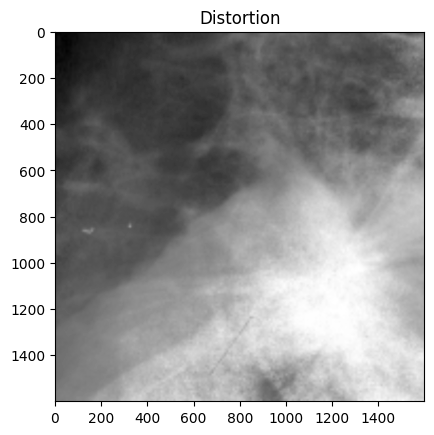

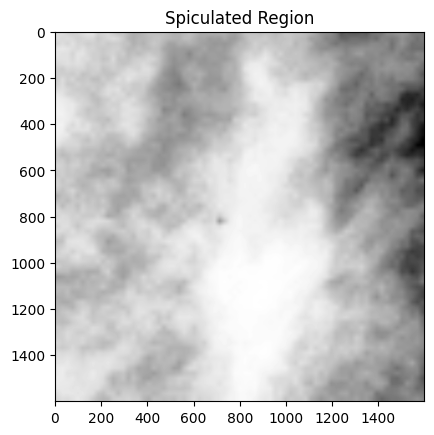

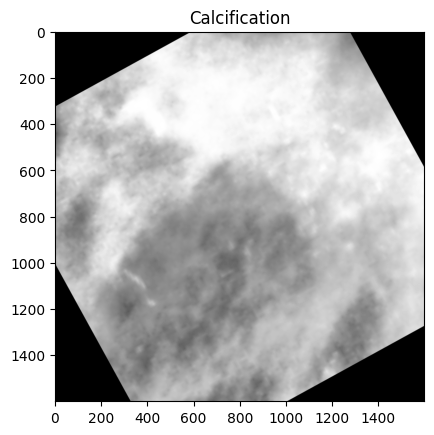

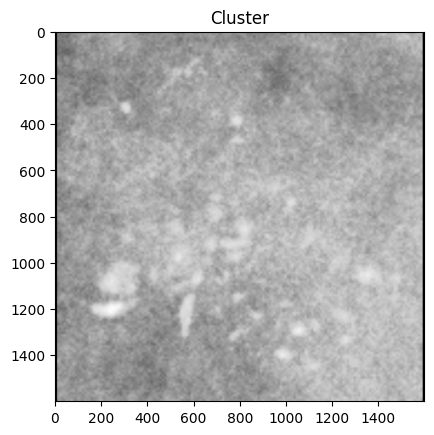

In [7]:
class_gen = loader.classification_generator(classify_types=True)

types_found = list(types.keys())

for img, type in class_gen():
    if type in types_found:
        types_found.remove(type)
        plt.title(type)
        plt.imshow(img, cmap="gray")
        plt.show()
        if len(types_found) == 0:
            break

In [8]:
class_gen = loader.classification_generator()

types_bm=defaultdict(int)
for img, type in class_gen():
    types_bm[type]+=1

types_bm

defaultdict(int, {'B': 7611, 'M': 3267})